# Test file

## Imports

In [1]:
# MLflow
import mlflow
from mlflow.models import infer_signature

# MLflow model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualizations
import matplotlib.pyplot as plt

# math functions
import numpy as np

## Load training data

In [68]:
# read CSV file
import os
import glob

# data frames
import pandas as pd

# future warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.DataFrame()
df_files = {}
for fname in glob.glob(os.path.abspath('./data/**/*.csv')):
    _df=pd.read_csv(fname)
    df = df.append(_df.copy(), ignore_index=True)
    #break
    df_files[os.path.basename(fname)] = _df
    
df['ai_mention'] = df['blurb'].str.contains('artificial intelligence')
df['backers_count'] = pd.to_numeric(df['backers_count'], errors='coerce')
df = df.dropna(subset=["backers_count"], how="all")
df = df.dropna(subset=["ai_mention"], how="all")

In [70]:
print(len(df.index))
df.info()
#df.loc[df['ai_mention']==True]

25954
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25954 entries, 0 to 25956
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backers_count             25954 non-null  int64  
 1   blurb                     25954 non-null  object 
 2   category                  25954 non-null  object 
 3   converted_pledged_amount  25054 non-null  float64
 4   country                   25954 non-null  object 
 5   country_displayable_name  25954 non-null  object 
 6   created_at                25954 non-null  int64  
 7   creator                   25954 non-null  object 
 8   currency                  25954 non-null  object 
 9   currency_symbol           25954 non-null  object 
 10  currency_trailing_code    25954 non-null  bool   
 11  current_currency          25954 non-null  object 
 12  deadline                  25954 non-null  int64  
 13  disable_communication     25954 non-null  bool   
 14  

## Train the model

In [69]:
# MLflow model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer as imp

# Enable automatic logging to MLflow
mlflow.set_experiment("MLflow")
mlflow.autolog()

# Use the Kickstarter dataset
"""
    ['backers_count', 'blurb', 'category', 'converted_pledged_amount', 'country', 'country_displayable_name', 
    'created_at', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 
    'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 
    'launched_at', 'location', 'name', 'percent_funded', 'photo', 'pledged', 'prelaunch_activated', 'profile', 
    'slug', 'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls', 
    'usd_exchange_rate', 'usd_pledged', 'usd_type', 'video']
"""
#X = df[feature_names]
#y = df[target_name]
feature_names = ['backers_count','spotlight','staff_pick','percent_funded', 'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'goal']
target_name = 'ai_mention'
X = df.loc[:, df.columns[:,None] == feature_names]
y = df.loc[:, df.columns == target_name].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

params = {'n_estimators':100, 'max_depth':6, 'max_features':3}

# Train the model
rf = RandomForestRegressor(**params)

# MLflow triggers logging automatically upon model fitting
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

2024/02/14 20:23:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/02/14 20:23:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '43d34b919128478a96df771b87357f5f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


## Graph the model

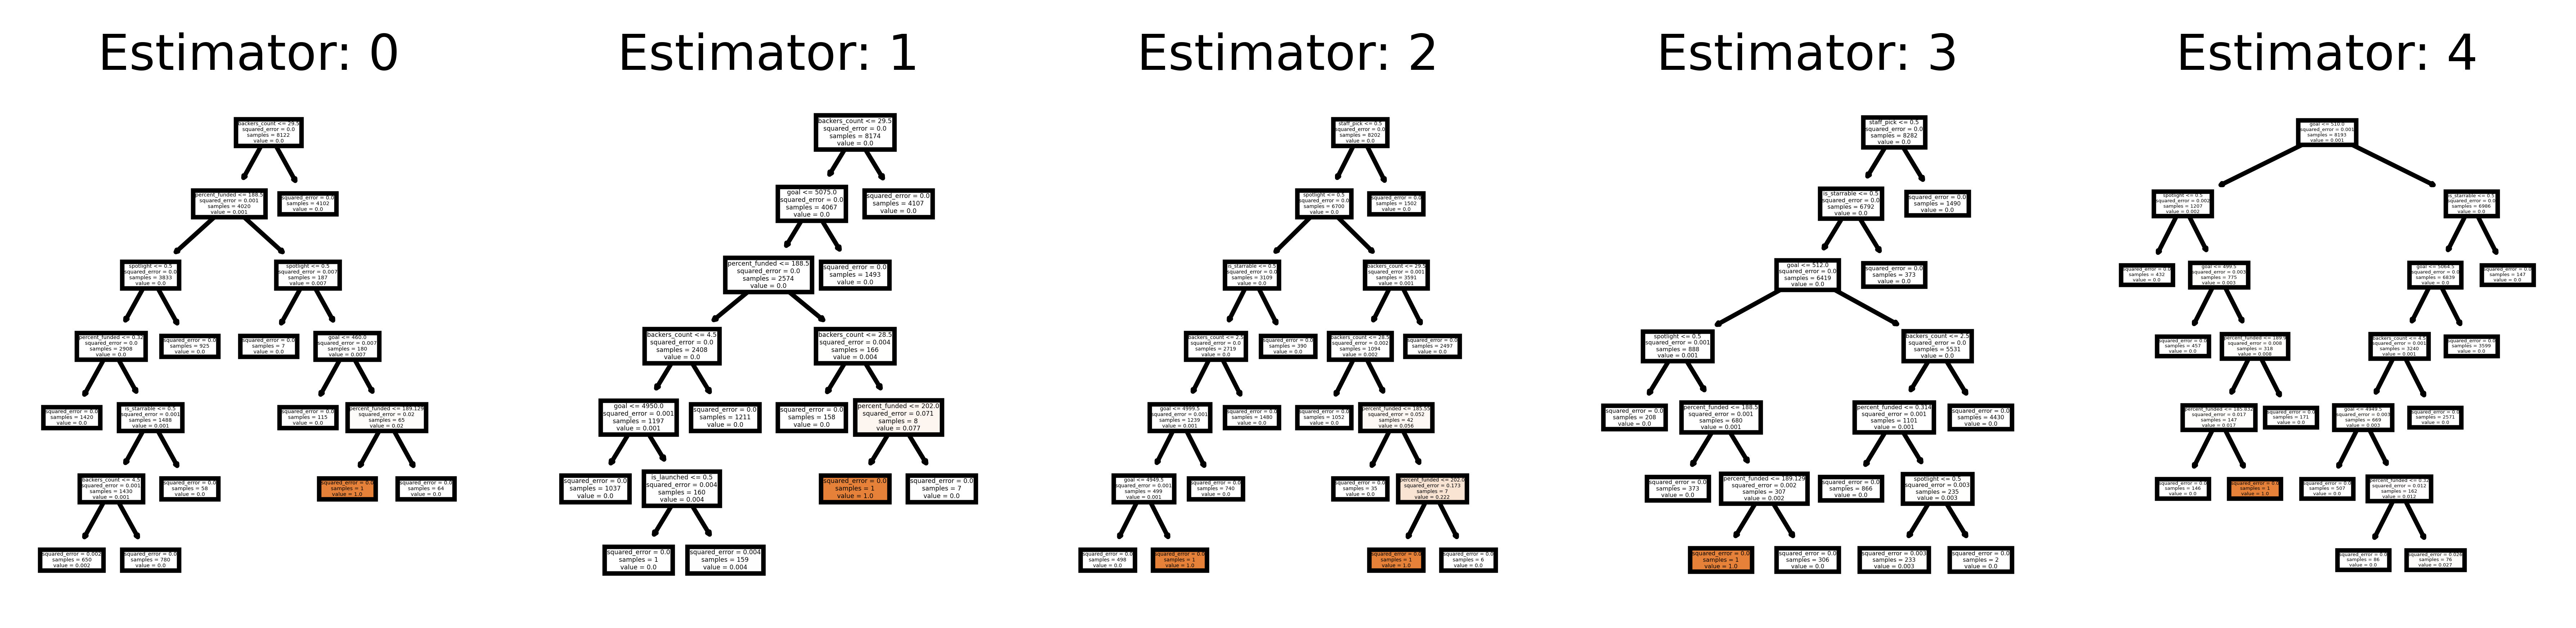

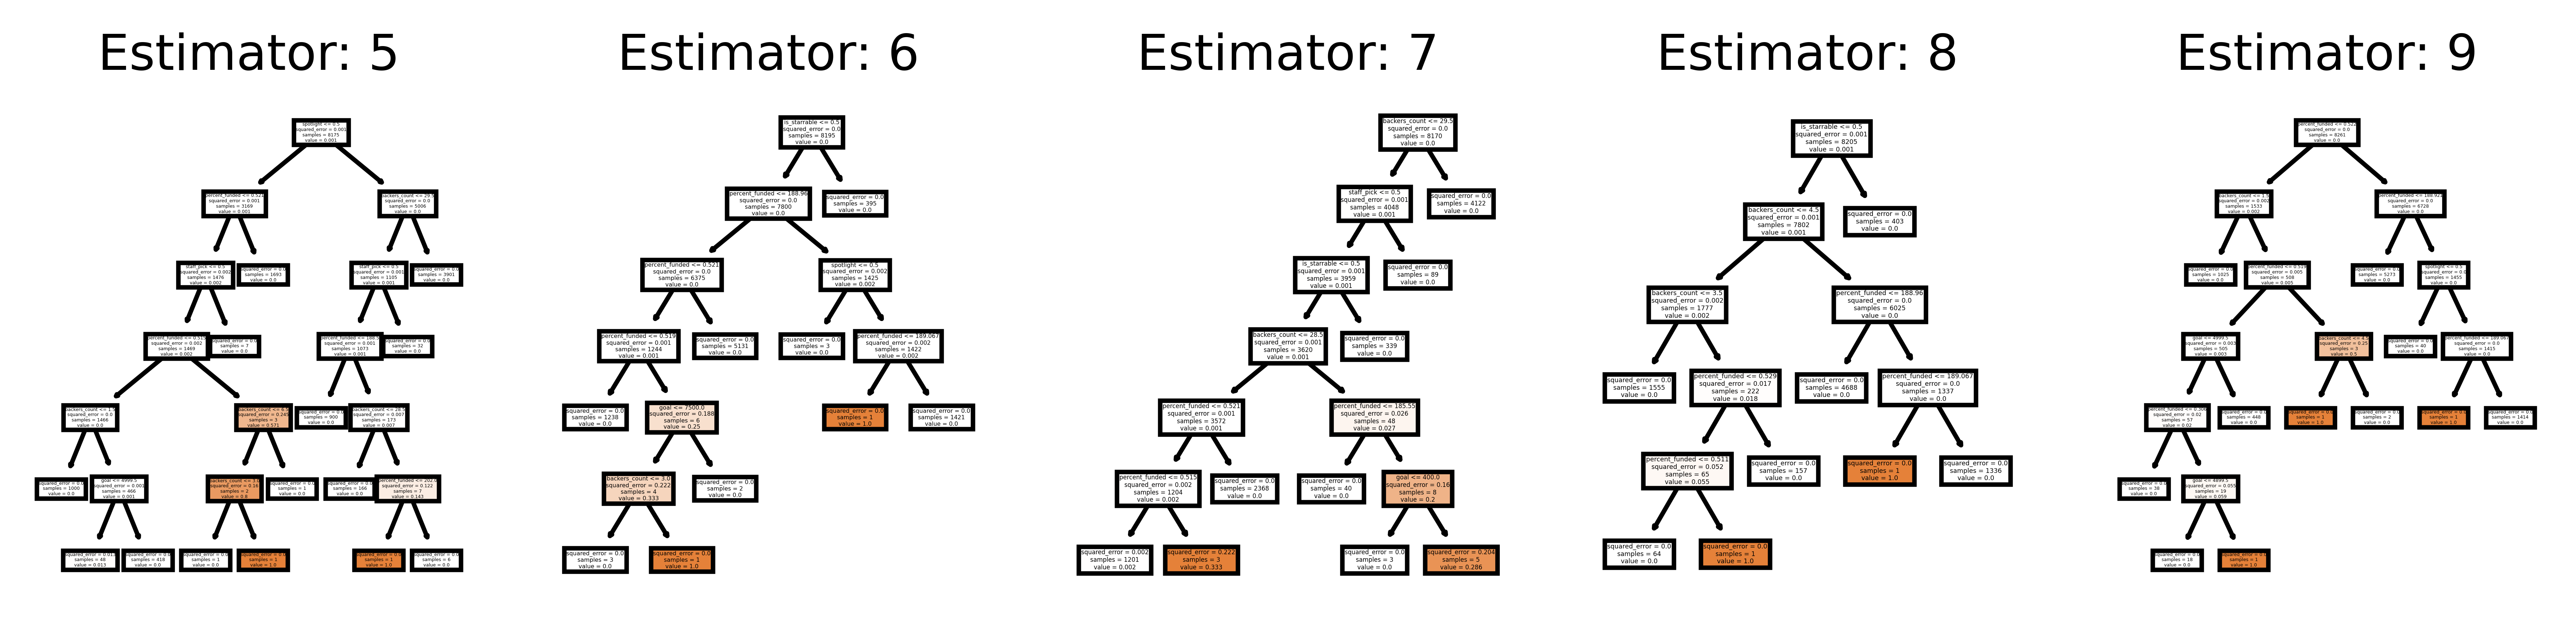

In [71]:
from sklearn import tree
fn=X_train.columns
cn=target_name
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
        feature_names = fn,
        class_names=cn,
        filled = True,
        ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
next = 5
for index in range(0+next, 5+next):
    axes_idx = index - next
    tree.plot_tree(rf.estimators_[index],
        feature_names = fn,
        class_names=cn,
        filled = True,
        ax = axes[axes_idx])
    axes[axes_idx].set_title('Estimator: ' + str(index), fontsize = 11)



0.0008788181765081268


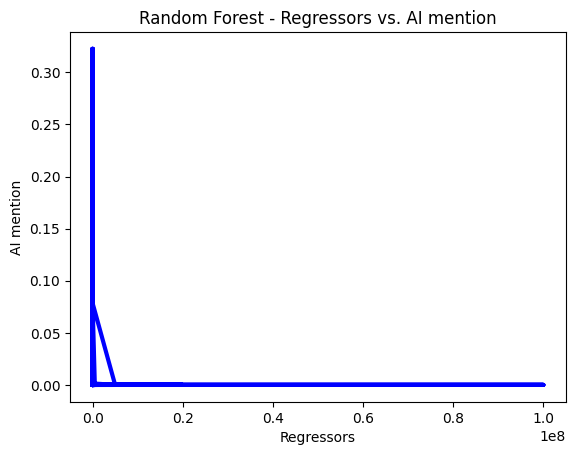

In [72]:
accuracy = mean_absolute_error(y_test, y_pred)
print(accuracy)
#plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Regressors')
plt.ylabel('AI mention')
plt.title('Random Forest - Regressors vs. AI mention')
plt.show()